# Deep Learning Bootcamp November 2017, GPU Computing for Data Scientists

<img src="images/bcamp.png" align="center">

## Using CUDA, Jupyter, PyCUDA and PyTorch

### 03 PyCUDA Sigmoid()

Web: https://www.meetup.com/Tel-Aviv-Deep-Learning-Bootcamp/events/241762893/

Notebooks: <a href="https://github.com/QuantScientist/Data-Science-PyCUDA-GPU"> On GitHub</a>

*Shlomo Kashani*

<img src="images/gtx.png" width="35%" align="center">

# PyCUDA Imports

In [ ]:
# !pip install pycuda
%reset -f
import pycuda
from pycuda import compiler
import pycuda.driver as cuda
import numpy
import numpy as np

from pycuda.compiler import SourceModule

cuda.init()
print("%d device(s) found." % cuda.Device.count())           
for ordinal in range(cuda.Device.count()):
    dev = cuda.Device(ordinal)
    print "Device #%d: %s" % (ordinal, dev.name())    

print cuda

Error: cuInit failed: unknown error

In [5]:
! watch --color -n1.0 gpustat

>6m[0] GeForce GTX 1080 | 37'C,   0 % |   778 /  8111 MB |111223455667789[32020[01122[333[045667788993030112233445677889940408117223344556678995050112233445566778892:002:011223344556687778899101012[433[0445566778899202011223455667788993030112233445677889940401122334455667899505011223344556677893:003:00112233445566778899101122334485576677888997202011823744556677889930301122338457667788994040811227334455678889950507112283374455866777894:004:008211[02273384475588

# Simple addition on the GPU: CUDA Kernel definition

In [15]:
import pycuda.autoinit
# a = np.random.uniform(low=1, high=20, size=(10,))
a = numpy.arange(-100000, 100000, 1)
a = a.astype(numpy.float32)

ARR_SIZE = numpy.int32(a.shape[-1])
print ARR_SIZE 

a_gpu = cuda.mem_alloc(a.nbytes)
xout_gpu = cuda.mem_alloc(a.nbytes)

cuda.memcpy_htod(a_gpu, a)
xout_gpu=cuda.mem_alloc_like(a)
# size_gpu=cuda.mem_alloc_like(size)

mod = SourceModule("""  
  
  __global__ void sigmoid(float* a, float* b, int size)
    {
        int index = blockDim.x * blockIdx.x + threadIdx.x;
        if (index < size)
            b[index] = 1.0f / (1.0f + exp(-1.0f * a[index]));
    }
  """)

func = mod.get_function("sigmoid")

def sigmoidGPU():
    func(a_gpu, xout_gpu,ARR_SIZE, block=(ARR_SIZE/1024,1,1))
    a_sigmoid = numpy.empty_like(a)
    cuda.memcpy_dtoh(a_sigmoid, xout_gpu)
    return a_sigmoid

# print sigmoidGPU()

from scipy.special import expit
y = expit(a)
# print ("__________________________________")
# print y

200000


# Plot the Sigmoid function

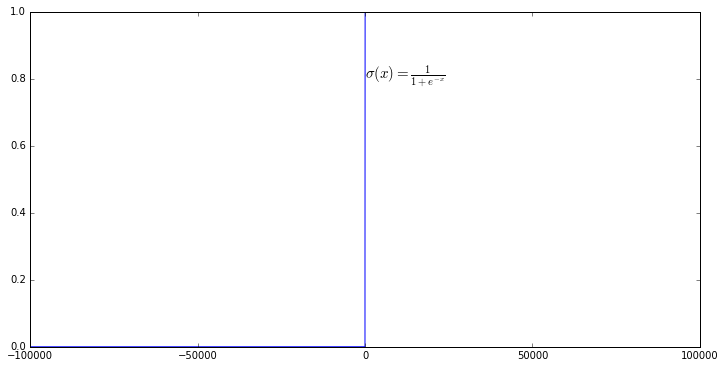

In [16]:
import matplotlib.pyplot as plt

plt.plot(a,y)
plt.text(4,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=15)
plt.legend(loc='lower right')
plt.show()

# Timing Numpy vs. PyCUDA ...

In [17]:
import timeit
n_iter = ARR_SIZE
rounds = 1000  # for timeit

print 'numpy', timeit.timeit(lambda: 
                              expit(a), 
                              number=rounds)

print 'pycuda', timeit.timeit(lambda: 
                              sigmoidGPU(), 
                              number=rounds)

numpy 1.91676592827
pycuda 0.144371032715
